# Final Project Submission

Please fill out:
* **Student name:** Milad Shirani
* **Student pace:** self paced
* **Scheduled project review date/time:** 
* **Instructor name:** Claude Fried
* **Blog post URL:**


# Importing Data

In this note, we are trying to help homeowners to buy or sell homes by predicting the price of the property. In order to do so, we use regression methods to find an appropriate model to fit housing price data so that we can predict the price of different houses with different features. First we are going to import the data and save it into a dataframe `data_initial` and after that we select some columns as the features of our model.

The `dataframe` that we are using in the rest of the work is called `df` which contains the following columns

```
['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long']

```
in which the following columns are treated as categorical data

```
'waterfront', 'condition', 'grade', 'zipcode'
```
and the rests are treated as numerical data.
       
       

In [64]:
# Your code here - remember to use markdown cells for comments as well!

import os
import numpy as np
from glob import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

data_initial = pd.read_csv("./data/kc_house_data.csv")


to_drop_initial = ["date", "view", "sqft_above" ,"sqft_basement", "yr_renovated", 
           "sqft_living15", "sqft_lot15", "id"]

df = data_initial.drop(columns = to_drop_initial, axis = 1)

# Functions we use

In this section, the functions we used to get some information about data (`corr` function) or create a final dataframe to use (`concatenate` function) or will return the `R2`score and condition number (`summary_of_results` function). These functions are:

1. `corr`
2. `summary_of_results`
3. `concatenate`

Each of these functions is introduced below.

## `corr`

In order to get the correlation coefficients, we define a function that takes two inputs which are data and then the minimum value of the correlation. This minimum value will be used to find features with correlation more than or equal to this minimum value. 


In [65]:
def corr(data, value):
    corr_table = data.corr().abs().stack().reset_index().sort_values(0, 
                                                            ascending=False)
    
    corr_table["pairs"]=list(zip(corr_table["level_1"],corr_table["level_0"]))
    
    corr_table.drop(columns = ["level_1", "level_0"], inplace = True)
    corr_table.reset_index(inplace = True, drop = True)


    corr_1 = corr_table.iloc[0:len(data.columns)].index
    corr_table.drop(index = corr_1, inplace = True)
    corr_table.reset_index(inplace = True, drop = True)
    table1 = corr_table.iloc[range(0, len(corr_table), 2)]
    table = table1.loc[table1[0]>value]
    table.reset_index(inplace = True, drop = True)
    
    
    return table

## summary_of_results

In order to update the text automatically and get `R2` score and collinearity, we are going to convert `results_summary` obtained from `statsmodels` library into `Pandas DataFrame` to find `R2-scores`, `coefficients` and `P-values` for different models.

In [66]:
def summary_of_results(data, to_drop, pval):
    import statsmodels.api as sm
    
    features = df_final.drop(columns = to_drop, axis = 1)
    X = sm.add_constant(features)
    model = sm.OLS(df_final["price"], X)
    results = model.fit()
    results_summary = results.summary()
    
    ### Converting results_summary to pandas dataframe
    results_R2 = results_summary.tables[0].as_html()
    R2_df = pd.read_html(results_R2, header=0, index_col=0)[0]
    R2_df.reset_index(inplace = True)
    R2_df = R2_df.columns.to_frame().T.append(R2_df, ignore_index=True)
    R2_df.columns = range(len(R2_df.columns))
    
    

    results_coeff = results_summary.tables[1].as_html()
    coeff_df = pd.read_html(results_coeff, header=0, index_col=0)[0]
    coeff_df.reset_index(inplace = True)
    coeff_df = coeff_df.columns.to_frame().T.append(coeff_df, 
                                                    ignore_index=True)
    coeff_df.columns = range(len(coeff_df.columns))



    results_collin = results_summary.tables[2].as_html()
    collin_df = pd.read_html(results_collin, header=0, index_col=0)[0]
    collin_df.reset_index(inplace = True)
    collin_df = collin_df.columns.to_frame().T.append(collin_df, 
                                                      ignore_index=True)
    collin_df.columns = range(len(collin_df.columns))
    
    
    R2 = R2_df.iloc[0, 3]

    collinearity_num = collin_df.iloc[3, 3]

    coeff = coeff_df.iloc[1:,[0,4, 1]]
    
    coeff.columns = ["feature", "P-value", "coefficient"]
    
    coeff["coefficient_absolute_value"] = np.abs(coeff["coefficient"])
    coeff.sort_values(by = "coefficient_absolute_value", 
                            ascending = True, inplace = True)
    
    
    critical_pval = coeff.loc[coeff["P-value"]>= pval]

    
    return [R2, collinearity_num, critical_pval, coeff]

## `concatenate`

This functions will return the final dataframe that we use for our analysis.

In [67]:
def concatenate(  
               include_grade = False,     
               include_zipcode = False,
               include_condition = False
                ):
    
    data    = df_no_outliers 
    sub_df1 = grade_num_df
    sub_df2 = zipcode_num_df
    sub_df3 = condition_num_df
    
    include_sub_df1 = include_grade
    include_sub_df2 = include_zipcode
    include_sub_df3 = include_condition
    
    if (include_sub_df1 == True 
        and include_sub_df2 == False 
        and include_sub_df3 == False):
        
        df_final = pd.concat([data, sub_df1], axis = 1)
        
    elif (include_sub_df1 == False 
        and include_sub_df2 == True 
        and include_sub_df3 == False):
        
        df_final = pd.concat([data, sub_df2], axis = 1)
        
    elif (include_sub_df1 == False 
        and include_sub_df2 == False 
        and include_sub_df3 == True):
        
        df_final = pd.concat([data, sub_df3], axis = 1)    
        
    elif include_sub_df1 == True and include_sub_df2 == True:
        
        df_final = pd.concat([data, sub_df1, sub_df2], axis = 1)
        
    elif include_sub_df1 == True and include_sub_df3 == True: 
        
        df_final = pd.concat([data, sub_df1, sub_df3], axis = 1)
        
    elif include_sub_df2 == True and include_sub_df3 == True: 
        
        df_final = pd.concat([data, sub_df2, sub_df3], axis = 1)
        
    else:
        
        df_final = pd.concat([data, sub_df1, sub_df2, sub_df3], axis = 1)
        
    return df_final

# Some Insight Into Data

In order to find the outliers and how the data looks like, we will plot scatter plot for both categorical and numerical data as well as histogram for numerical data. In order to do so, first we need to find categorical and numerical data. To do this we use `select_dtypes` method as shown below:

In [68]:
y = df["price"]
numerical  = df.drop(columns = ["price", "zipcode"], axis = 1).select_dtypes(
    include=["float64", "int64"])
l = list(numerical.columns)
l.append("price")
categorical = df.drop(columns = l, axis = 1)

## Scatter Plots for Categorical Features

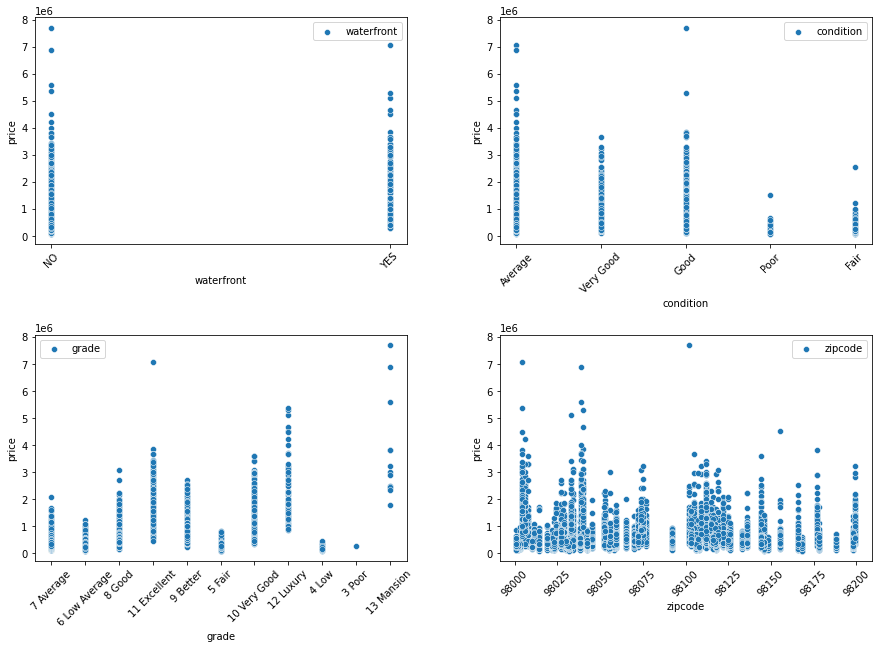

In [69]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.25)

to_pick = list(categorical.columns)

for i,col in enumerate(to_pick):
    ax = axes[i//2][i%2]
    sns.scatterplot(x = df[col], y = df["price"], ax = ax, label = col)
    ax.tick_params(axis='x', labelrotation = 45)
    

In [70]:
len(categorical.loc[categorical["grade"] == "3 Poor"])

1

## Scatter Plots for Numerical data

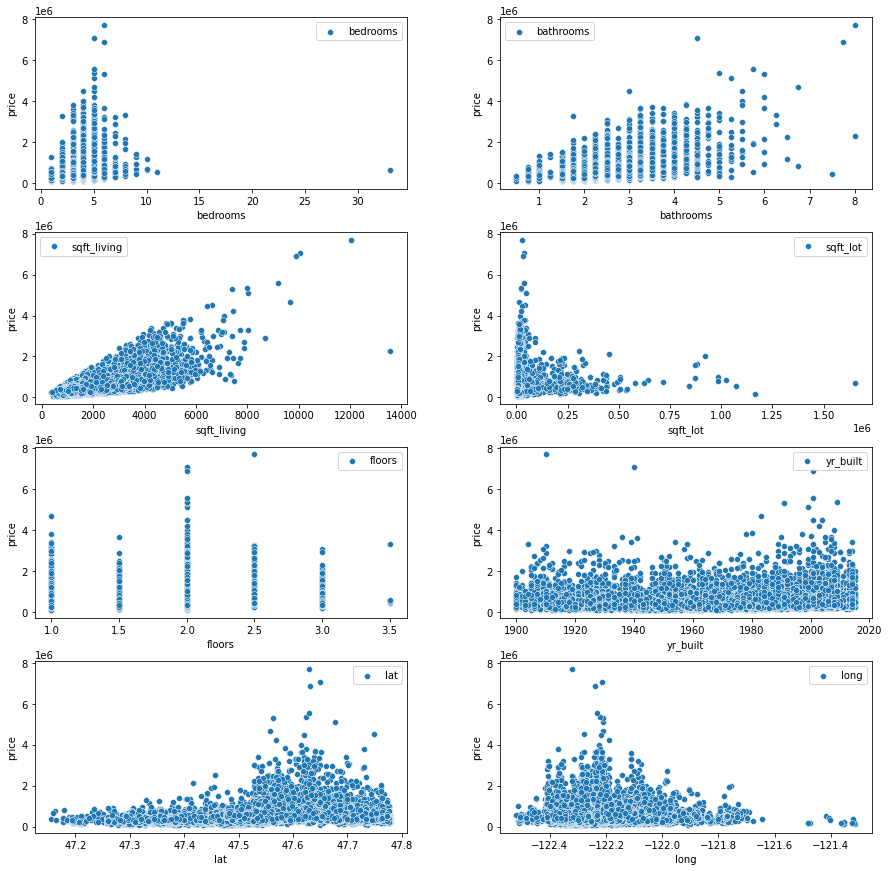

In [71]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,15))
fig.subplots_adjust(hspace=0.25, wspace=0.25)

to_pick = list(numerical.columns)

for i,col in enumerate(to_pick):
    ax = axes[i//2][i%2]
    sns.scatterplot(x = df[col], y = df["price"], ax = ax, label = col)
    

## Dropping Outliers

As we can see there are some outliers in the `bedrooms`, `sqft_lot` and `sqft_living`. So we are going to drop that first

In [72]:
import scipy.stats as stats

z = stats.zscore(df["price"], ddof=0)
df["z_score"] = stats.zscore(df["price"], ddof=0)
df_no_outliers = df.loc[(df["z_score"] < 3) & (df["z_score"] > -3)]
df_no_outliers.drop(columns = "z_score", axis = 1, inplace = True)

In [75]:
max_b = 8 #max(df_no_outliers["bedrooms"])
max_bath = 7
max_lot = max(df_no_outliers["sqft_lot"])
max_liv = max(df_no_outliers["sqft_living"])

condition = ((df_no_outliers["bedrooms"] == max_b)
             | (df_no_outliers["bathrooms"] == max_bath) 
             | (df_no_outliers["sqft_lot"] == max_lot)
             | (df_no_outliers["sqft_living"] == max_liv)
             | (df_no_outliers["grade"] == "3 Poor"))
ind = df_no_outliers.loc[condition].index


df_no_outliers.drop(index = ind, inplace = True)


In [76]:
y = df_no_outliers["price"]
numerical  = df_no_outliers.drop(columns = ["price", "zipcode"]
                    , axis = 1).select_dtypes(include=["float64", "int64"])
l = list(numerical.columns)
l.append("price")
categorical = df_no_outliers.drop(columns = l, axis = 1)

Now we are going to convert (scaling and normalizing) the data in the columns `price`, `lat`, `long`, `yr_built`, `sqft_living` and `sqft_lot` to make the data more normal. However, if we check we realize that the values of the column `long` are all negative and we need to first multiply them with a minus sign to be able to convert them by a logarithmic function. 

In [77]:
sum(df_no_outliers["long"] > 0)
df_no_outliers["long"] = -1 * df_no_outliers["long"]
to_convert = ["price", "long", "lat", 'sqft_living', 'sqft_lot', "yr_built" ] 
for item in to_convert:
    if item == "price":
        df_no_outliers[item] = np.log(df_no_outliers[item])
    else:
        df_no_outliers[item] = np.log(df_no_outliers[item])
        numerical[item] = np.log(numerical[item])
        
        

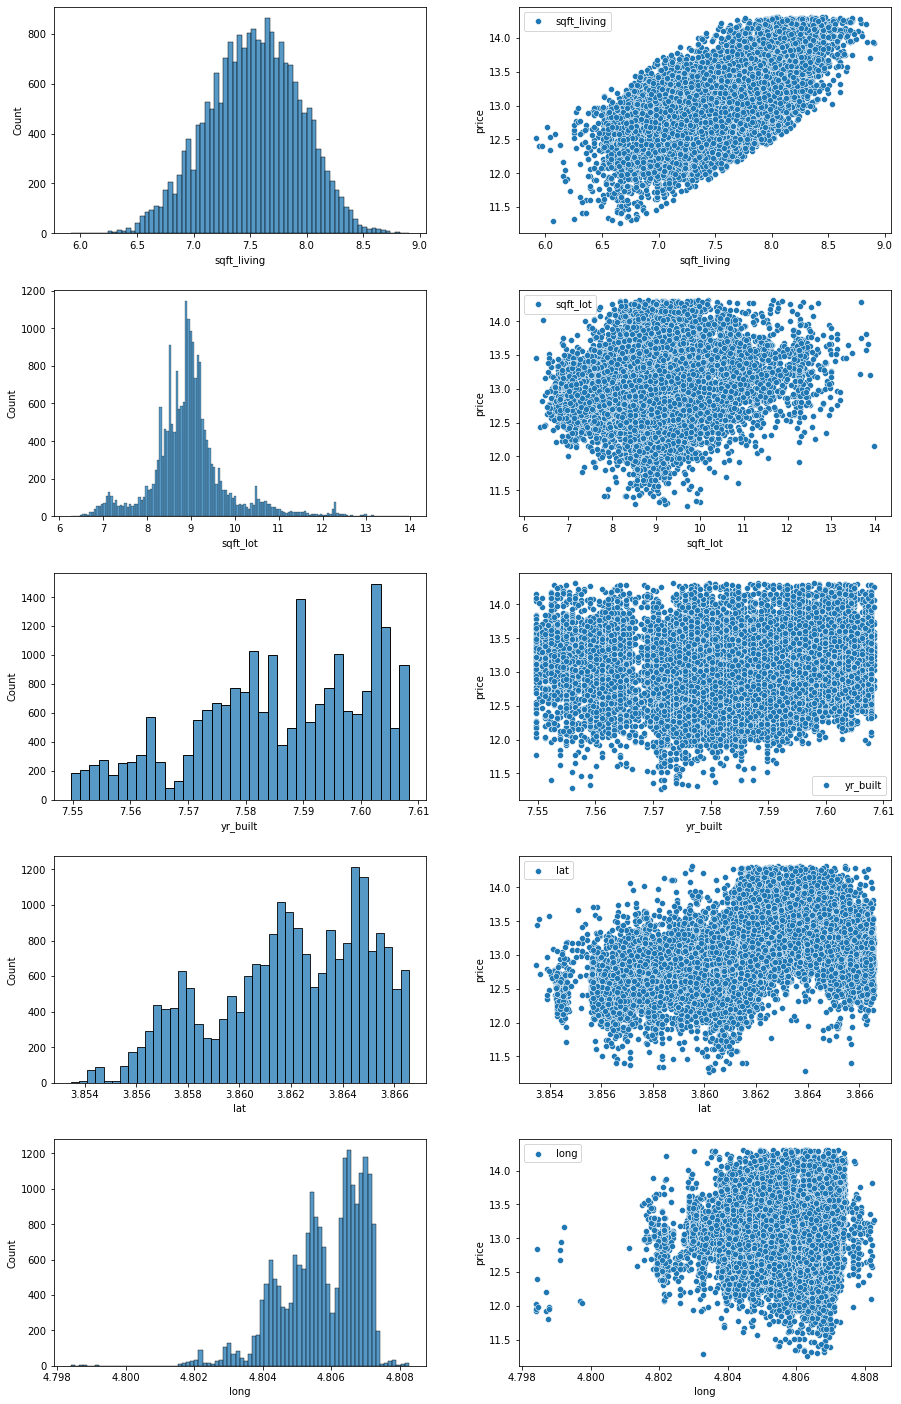

In [78]:
to_pick = list(numerical.columns)

to_pick.remove("bedrooms")
to_pick.remove("bathrooms")
to_pick.remove("floors")


r = len(to_pick)
c = 2
fig, axes = plt.subplots(nrows = r, ncols = c, figsize = (15,25))
fig.subplots_adjust(hspace=0.25, wspace=0.25)



for i,col in enumerate(to_pick):
    axh = axes[i%r][0]
    axs = axes[i%r][1]
    sns.histplot(x = df_no_outliers[col],ax = axh, label = col)
    sns.scatterplot(x = df_no_outliers[col],y = df_no_outliers["price"]
                    , ax = axs, label = col)

Let's also check the histogram and Q-Q plot of `price` to see if `price` is normal or not.

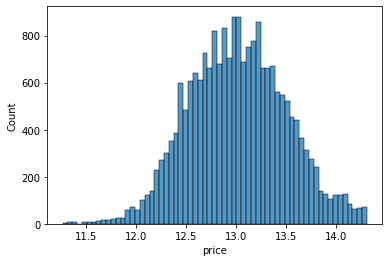

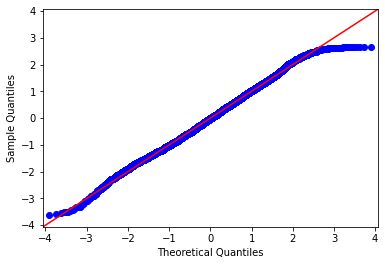

In [79]:
import scipy.stats as stats
import statsmodels.api as sm


sns.histplot(x = df_no_outliers["price"], label = "price");
sm.graphics.qqplot(df_no_outliers["price"], 
                   dist=stats.norm, line='45', fit=True);

# Categorical

First let's check the null values of categorical variable.

In [80]:
a = categorical.isna().sum().to_frame().reset_index()

It seems that `{{a.iloc[0,0]}}` has the total number of `{{a.iloc[0,1]}}` missing values.


## Creating New Column For Missing Values

We know that the column `{{a.iloc[0,0]}}` has `{{a.iloc[0,1]}}` missing values. Therefore, we are going to create a column called `{{a.iloc[0,0]}}_null` to indicate where data is missing. In order to do so, we take the following steps:

1. First we use `MissingIndicator` from `sklearn.impute` to create a column in `df` called `{{a.iloc[0,0]}}_null`. 

```python
from sklearn.impute import MissingIndicator
```

2. then we are going to impute the missing values in the column `{{a.iloc[0,0]}}` by using `SimpleImputer` from `sklearn.impute`. 

```python
from sklearn.impute import SimpleImputer
```

3. At the end, we will use `OrdinalEncoder` from `from sklearn.preprocessing` to convert the binary values into numerical values.

```python
from sklearn.preprocessing import OrdinalEncoder
```

### Missing Indicator for `waterfront`

In [81]:
### Missing Indicator for waterfront
import warnings 
from sklearn.impute import MissingIndicator
warnings.filterwarnings("ignore")
missing_indicator = MissingIndicator()

null_val = df_no_outliers[["waterfront"]]
missing_indicator.fit(null_val)

df_no_outliers["waterfront_null"] = missing_indicator.transform(null_val)


### Imputing Missing Values for `waterfront`

In [82]:
### Imputing Missing Values for waterfront

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df_no_outliers[["waterfront"]])
df_no_outliers["waterfront_impute"] = imputer.transform(
    df_no_outliers[["waterfront"]])

### Convert Categorical `waterfront` into Numbers

#### Converting the Column `waterfront_impute` to numerical value

In [83]:
### Converting the Column waterfront_impute to numerical value

from sklearn.preprocessing import OrdinalEncoder

encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(df_no_outliers[["waterfront_impute"]])

# encoder_waterfront.categories_[0]
encoder_waterfront_transform = encoder_waterfront.transform(
    df_no_outliers[["waterfront_impute"]]).flatten()
# encoder_waterfront_transform

df_no_outliers["waterfront_impute"] = encoder_waterfront_transform

df_no_outliers.drop(columns = ['waterfront'], inplace = True, axis = 1)



#### Converting the Column `waterfront_null` to Numerical value

In [84]:
### Converting the Column waterfront_null to Numerical value


from sklearn.preprocessing import OrdinalEncoder

encoder_waterfront_null = OrdinalEncoder()
encoder_waterfront_null.fit(df_no_outliers[["waterfront_null"]])

# encoder_waterfront_null.categories_[0]

encoder_waterfront_null_transform = encoder_waterfront_null.transform(
    df_no_outliers[["waterfront_null"]]).flatten()

df_no_outliers["waterfront_null"] = encoder_waterfront_null_transform


## Converting `condition`, `grade` and `zipcode` to numerical values

In order to convert categorical values with multiple values we should use `OneHotEncoder` from `sklearn.preprocessing`. We have two columns `condition` and `grade` with the following values

1. `condition`

`{{categorical["condition"].value_counts()}}`

2. `grade`

`{{categorical["grade"].value_counts()}}`

3. `zipcode`

`{{categorical["zipcode"].value_counts()}}`

### Converting `condition` to numerical values

In [85]:
from sklearn.preprocessing import OneHotEncoder

condition_cat = df_no_outliers[["condition"]]

ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(condition_cat)
# ohe.categories_
condition_num = ohe.transform(condition_cat)
condition_num_df = pd.DataFrame(condition_num, 
                               columns = ohe.categories_[0],
                               index = df_no_outliers.index)
df_no_outliers.drop(columns = ["condition"], inplace = True, axis = 1)

### Converting `grade` to numerical values

In [86]:
from sklearn.preprocessing import OneHotEncoder

grade_cat = df_no_outliers[["grade"]]

ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(grade_cat)
# ohe.categories_
grade_num = ohe.transform(grade_cat)
grade_num_df = pd.DataFrame(grade_num, 
                           columns = ohe.categories_[0],
                           index = df_no_outliers.index)
df_no_outliers.drop(columns = ["grade"], inplace = True, axis = 1)

### Converting `zipcode` to numerical values

In [87]:
from sklearn.preprocessing import OneHotEncoder

zipcode_cat = df_no_outliers[["zipcode"]]

ohe = OneHotEncoder(categories='auto', sparse=False, drop= "first")
ohe.fit(zipcode_cat)
zipcode_num = ohe.transform(zipcode_cat)

zipcode_num_df = pd.DataFrame(zipcode_num, 
                           columns = ohe.categories_[0][1:],
                           index = df_no_outliers.index)
df_no_outliers.drop(columns = ["zipcode"], inplace = True, axis = 1)

In [88]:
type(zipcode_cat)

pandas.core.frame.DataFrame

# Preprocessing

## Putting `grade`, `condition` and `zipcode` into the model.

First we want to see how different features affect the data. If we include `grade_num_df`, `zipcode_num_df` and `condition_num_df`, we get `R2-score` and collinearity as:

In [89]:
df_final = concatenate(include_grade = True, include_zipcode = True,
                       include_condition = True)
to_drop = ["price"]
l = summary_of_results(data = df_final, to_drop = to_drop, pval = 0.05)
print("R2        : ", l[0])
print("Cond. No. : ", l[1])
print(len(str(l[1])))

R2        :  0.854
Cond. No. :  2380000000000000.0
18


the `R2` score which is `{{l[0]}}` is really good but `Cond. No.` which is `{{l[1]}}`. If we calculate the `variance-inflation factors` (which we did not show here) we will notice that including `zipcode_num_df` into the final dataframe will cause a lot of collinearities as shown below

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


df_final = concatenate(include_grade = True, include_zipcode = True,
                       include_condition = True)
to_drop = ["price"]

XX = df_final.drop(columns = to_drop, axis = 1)

XX_constant_added = sm.add_constant(XX)


vif = [
    variance_inflation_factor(XX_constant_added.values, i) 
    for i in 
       range(XX_constant_added.shape[1])
      ]
variance_inf_fact = pd.Series(vif, index=XX_constant_added.columns,
                              name="Variance Inflation Factor")


In [91]:
print(sum(variance_inf_fact>5))

48


Therefore, we just exclude this feature from rest of the work. 

## Putting only `condition` into the model.

If we only consider `condition` in the model, we find `R2` and `Cond. No.` as

In [92]:
df_final = concatenate(include_grade = False, include_zipcode = False,
                       include_condition = True)
to_drop = ["price"]
c = summary_of_results(data = df_final, to_drop = to_drop, pval = 0.05)
print("R2        : ", c[0])
print("Cond. No. : ", c[1])

R2        :  0.660
Cond. No. :  1.25e+17


Therefore, considering only `condition` in the model will result in `R2` score equals to `{{c[0]}}` and `Cond. No.` equals `{{c[1]}}` which are ,respectively, lower and higher than previous cases.

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


df_final = concatenate(include_grade = False, include_zipcode = False,
                       include_condition = True)
to_drop = ["price"]

XX = df_final.drop(columns = to_drop, axis = 1)

XX_constant_added = sm.add_constant(XX)


vif = [
    variance_inflation_factor(XX_constant_added.values, i) 
    for i in 
       range(XX_constant_added.shape[1])
      ]
variance_inf_fact = pd.Series(vif, index=XX_constant_added.columns,
                              name="Variance Inflation Factor")


In [94]:
variance_inf_fact

const                0.000000
bedrooms             1.682036
bathrooms            3.053615
sqft_living          3.273253
sqft_lot             1.639803
floors               1.759915
yr_built             2.065201
lat                  1.092291
long                 1.472368
waterfront_null      1.000615
waterfront_impute    1.017390
Average                   inf
Fair                      inf
Good                      inf
Poor                      inf
Very Good                 inf
Name: Variance Inflation Factor, dtype: float64

## Putting only `grade` into the model.

Now, finally if we only consider `grade` as the only categorical variable in the model, we find

In [95]:
df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = False)
to_drop = ["price"]
g = summary_of_results(data = df_final, to_drop = to_drop, pval = 0.05)
print("R2        : ", g[0])
print("Cond. No. : ", g[1])

R2        :  0.724
Cond. No. :  7.35e+16


Relative to the case where we only considered `condition`, we see that `R2` score has increased from `{{c[0]}}` to `{{g[0]}}` while `Cond. No.` has changed from `{{c[1]}}` to `{{g[1]}}`.

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = False)
to_drop = ["price"]

XX = df_final.drop(columns = to_drop, axis = 1)

XX_constant_added = sm.add_constant(XX)


vif = [
    variance_inflation_factor(XX_constant_added.values, i) 
    for i in 
       range(XX_constant_added.shape[1])
      ]
variance_inf_fact = pd.Series(vif, index=XX_constant_added.columns,
                              name="Variance Inflation Factor")


In [97]:
variance_inf_fact

const                0.000000
bedrooms             1.740996
bathrooms            3.082547
sqft_living          4.327557
sqft_lot             1.676544
floors               1.811632
yr_built             2.040505
lat                  1.117496
long                 1.488470
waterfront_null      1.000768
waterfront_impute    1.018021
10 Very Good              inf
11 Excellent              inf
12 Luxury                 inf
4 Low                     inf
5 Fair                    inf
6 Low Average             inf
7 Average                 inf
8 Good                    inf
9 Better                  inf
Name: Variance Inflation Factor, dtype: float64

## Putting `grade` and `condition`  into the model.

Now let's check how `grade_num_df` and `condition_num_df` affect the modeling. Therefore, we only consider these two features and we will get `R2-score` and collinearity as:

In [98]:
df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = True)
to_drop = ["price"]
gc = summary_of_results(data = df_final, to_drop = to_drop, pval = 0.05)
print("R2        : ", gc[0])
print("Cond. No. : ", gc[1])

R2        :  0.729
Cond. No. :  1.49e+17


Again, we see that the the `R2` score which is `{{gc[0]}}` is really good but `Cond. No.` which is `{{gc[1]}}` is really high. However, both condition and grade might be responsible for the quality of the house and we can just exclude one of them and use the other one. Before deciding which one to drop, let's check the coefficients with `p-values` greater than 0.05. 

In [99]:
gc[2]

,feature,P-value,coefficient,coefficient_absolute_value
10,waterfront_null,0.454,-0.0041,0.0041


We can see that `{{list(gc[2]["feature"])[0]}}` has p-values more than the critical value of `0.05`. Therefore, we are going to drop this columns. 




Therefore, we are going to include these categorical variables in the model and we will try to find the best features which will reduce the collinearity of the model's features. 

In [100]:
df_final.drop(columns = ["waterfront_null", "long"], axis = 1, inplace = True)

First we are going to drop `waterfront_null` and `long` from the dataframe and will check the `R2` and `Cond. No.`. At the same time we are going to calculate the correlation table to find the highly correlated features as

In [101]:
df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = True)
to_drop = ["price", "waterfront_null", "long"]
gc = summary_of_results(data = df_final, to_drop = to_drop, pval = 0.05)
print("R2        : ", gc[0])
print("Cond. No. : ", gc[1])
print()
# print(corr(df_final, value = 0.8))
# gc[3]

R2        :  0.728
Cond. No. :  1.39e+17



As we can see, `Average` and `Good` are highly correlated so we are going to drop `Average` and will keep only `Good`.

In [102]:
df_final.drop(columns = ["Average"], axis = 1, inplace = True)

By checking the coefficients, we notice that there are several groups of features that almost have similar coefficients which can we group them to reduce the number of features. In order to do so, we define new columns that contains linear combination of these features. These columns are:

1. `df_final["MLE"] = df_final["13 Mansion"] + df_final["12 Luxury"] + df_final["11 Excellent"]`


2. `df_final["BV"] = df_final["10 Very Good"] + df_final["9 Better"]`


3. `df_final["LF"] = df_final["4 Low"] + df_final["5 Fair"]`


4. `df_final["LA"] = df_final["7 Average"] + df_final["6 Low Average"]`


Moreover, we notice that by ignoring the following features, we can significantly reduce the collinearity from `{{gc[1]}}` to `{{gc_new[1]}}`

 `3 Poor`, `8 Good` , `floors`, `bedrooms`, `Good`, `Very Good`, `floors`, `bedrooms`, `bathrooms`.

In [112]:
df_final.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'yr_built', 'lat', 'long', 'waterfront_null', 'waterfront_impute',
       '10 Very Good', '11 Excellent', '12 Luxury', '4 Low', '5 Fair',
       '6 Low Average', '7 Average', '8 Good', '9 Better', 'Average', 'Fair',
       'Good', 'Poor', 'Very Good'],
      dtype='object')

In [113]:
df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = True)
to_drop = ["price", "waterfront_null", "long"#, "13 Mansion"
          , "12 Luxury"
          , "11 Excellent", "10 Very Good", "9 Better"
          , "4 Low", "5 Fair", "7 Average", "6 Low Average"
          , "8 Good", "Average", "Good", "Very Good"
          , "floors", "bedrooms", "bathrooms"]


df_final["MLE"] = (df_final["11 Excellent"] + df_final["12 Luxury"])
#                  + df_final["13 Mansion"])

df_final["BV"] = df_final["10 Very Good"] + df_final["9 Better"]
df_final["LF"] = df_final["4 Low"] + df_final["5 Fair"]
df_final["LA"] = df_final["7 Average"] + df_final["6 Low Average"]



gc_new = summary_of_results(data = df_final, to_drop = to_drop, pval = 0.05)
print("R2        : ", gc_new[0])
print("Cond. No. : ", gc_new[1])
print()

gc_new[3]

R2        :  0.707
Cond. No. :  24200.0



,feature,P-value,coefficient,coefficient_absolute_value
3,sqft_lot,0,-0.021,0.021
7,Fair,0,-0.163,0.163
8,Poor,0,-0.2138,0.2138
12,LA,0,-0.216,0.216
10,BV,0,0.2423,0.2423
11,LF,0,-0.4026,0.4026
9,MLE,0,0.4762,0.4762
2,sqft_living,0,0.5323,0.5323
6,waterfront_impute,0,0.5858,0.5858
4,yr_built,0,-6.2348,6.2348


However, we could not reduce the collinearity more than what we obtained. The reason might be because of including both categorical variables `condition` and `grade`. Therefore, we are jut going to pick one of them and we will drop the other one. For now we will not include ``conditions`` and we only include `grade` as a metric to determine the quality and condition of a house.

Similarly, we realize that if we drop the feature `sqft_lot` we can improve 

In [114]:
df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = True)
to_drop = ["price", "waterfront_null", "long"
#           , "13 Mansion", 
          , "12 Luxury", "11 Excellent"
          , "10 Very Good", "9 Better"
          , "4 Low", "5 Fair", "7 Average", "6 Low Average"
          , "8 Good", "Average", "Good", "Very Good"
          , "floors", "bedrooms", "bathrooms"]


df_final["MLE"] = (df_final["11 Excellent"]  + df_final["12 Luxury"])
#                 + df_final["13 Mansion"])

df_final["BV"] = df_final["10 Very Good"] + df_final["9 Better"]
df_final["LF"] = df_final["4 Low"] + df_final["5 Fair"]
df_final["LA"] = df_final["7 Average"] + df_final["6 Low Average"]


# df_final = concatenate(include_grade = True, include_zipcode = False,
#                        include_condition = True)

gc = summary_of_results(data = df_final, to_drop = to_drop, pval = 0.05)
print("R2        : ", gc[0])
print("Cond. No. : ", gc[1])
gc[3]

R2        :  0.707
Cond. No. :  24200.0


,feature,P-value,coefficient,coefficient_absolute_value
3,sqft_lot,0,-0.021,0.021
7,Fair,0,-0.163,0.163
8,Poor,0,-0.2138,0.2138
12,LA,0,-0.216,0.216
10,BV,0,0.2423,0.2423
11,LF,0,-0.4026,0.4026
9,MLE,0,0.4762,0.4762
2,sqft_living,0,0.5323,0.5323
6,waterfront_impute,0,0.5858,0.5858
4,yr_built,0,-6.2348,6.2348


In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


# df_final = concatenate(include_grade = False, include_zipcode = False,
#                        include_condition = True)
to_drop = to_drop

XX = df_final.drop(columns = to_drop, axis = 1)

XX_constant_added = sm.add_constant(XX)


vif = [
    variance_inflation_factor(XX_constant_added.values, i) 
    for i in 
       range(XX_constant_added.shape[1])
      ]
variance_inf_fact = pd.Series(vif, index=XX_constant_added.columns,
                              name="Variance Inflation Factor")


In [116]:
variance_inf_fact

const                2.658633e+06
sqft_living          2.066650e+00
sqft_lot             1.212492e+00
yr_built             1.363728e+00
lat                  1.103711e+00
waterfront_impute    1.007466e+00
Fair                 1.016620e+00
Poor                 1.014623e+00
MLE                  1.123734e+00
BV                   1.517834e+00
LF                   1.196819e+00
LA                   1.819606e+00
Name: Variance Inflation Factor, dtype: float64

## Considering only `grade`  into the modeling.

As we saw, including both `conditions` and `grades` will result in a high collinearity. Therefore, we are going to only include `grade` in our data sets. By doing so, we get `R2` equals to `{{gg[0]}}` and `Cond. No.` equals to `{{gg[1]}}` as shown below


In [118]:
df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = False)
to_drop = ["price"]
gg = summary_of_results(data = df_final, to_drop = to_drop, pval = 0.05)
print("R2        : ", gg[0])
print("Cond. No. : ", gg[1])
# gg[2]

R2        :  0.724
Cond. No. :  7.35e+16


However, we notice that `{{list(gg[2]["feature"])[0]}}` has `P-Values` more than `0.05`. Therefore, we are going to drop this feature, as a result we find `R2` and `Cond. No.` to be equal to `{{ggg[0]}}` and `{{ggg[1]}}`, respectively, as shown below:

In [120]:
df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = False)
to_drop = ["price"
          , "waterfront_null", "long"]
ggg = summary_of_results(data = df_final, to_drop = to_drop, pval = 0.05)
print("R2        : ", ggg[0])
print("Cond. No. : ", ggg[1])


R2        :  0.723
Cond. No. :  7.45e+16


Now, we notice that there are some features whose coefficients are close to each other. Therefore, we can group them and create new columns (as we did in the previous section) to reduce these features. Moreover, we see that if we drop some features we can reduce the collinearity significantly as shown below

In [125]:
df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = False)
to_drop = ["price"
          , "waterfront_null", "long"
          , "5 Fair", "4 Low"
          , "9 Better"
#           , "13 Mansion"
          , "12 Luxury", "11 Excellent"
          , "6 Low Average", "7 Average", "8 Good"
          , "sqft_lot", "bedrooms", "floors", "bathrooms"]

df_final["LF"] = df_final["4 Low"] + df_final["5 Fair"]
# df_final["PB"] = df_final["3 Poor"] + df_final["9 Better"]
df_final["MLE"] = (df_final["11 Excellent"] + df_final["12 Luxury"])
#                 +  df_final["13 Mansion"] 

df_final["MLE"] = (df_final["6 Low Average"] + df_final["7 Average"]
                + df_final["8 Good"])


g4 = summary_of_results(data = df_final, to_drop = to_drop, pval = 0.05)
print("R2        : ", g4[0])
print("Cond. No. : ", g4[1])
g4[3]

R2        :  0.675
Cond. No. :  18200.0


,feature,P-value,coefficient,coefficient_absolute_value
6,10 Very Good,0,0.0826,0.0826
8,MLE,0,-0.2911,0.2911
7,LF,0,-0.4794,0.4794
5,waterfront_impute,0,0.6048,0.6048
2,sqft_living,0,0.6259,0.6259
3,yr_built,0,-4.2087,4.2087
4,lat,0,69.1498,69.1498
1,const,0,-226.589,226.589


The problem is that we almost lost all the numerical features. Therefore, we need to drop some categorical features and not combine them so that we can keep some of the numerical features.

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


# df_final = concatenate(include_grade = False, include_zipcode = False,
#                        include_condition = True)
to_drop = to_drop

XX = df_final.drop(columns = to_drop, axis = 1)

XX_constant_added = sm.add_constant(XX)


vif = [
    variance_inflation_factor(XX_constant_added.values, i) 
    for i in 
       range(XX_constant_added.shape[1])
      ]
variance_inf_fact = pd.Series(vif, index=XX_constant_added.columns,
                              name="Variance Inflation Factor")
variance_inf_fact 

const                2.418924e+06
sqft_living          1.584164e+00
yr_built             1.230980e+00
lat                  1.047164e+00
waterfront_impute    1.004783e+00
10 Very Good         1.293799e+00
LF                   1.266001e+00
MLE                  1.809774e+00
Name: Variance Inflation Factor, dtype: float64

# Features Selection


## First Approach By using p-values, R2 scores and Condition number.

Now we will try to drop categorical features to improve `R2` and `Cond. No.`. This process is shown below:

1. First we drop `waterfront_null`, `long` because the `p-values` for them are more than `0.05`. After dropping these columns, we find `R2` and `Cond. No.` as `0.752` and `2.58e+16`, respectively. Now we go to the next step.


2. We see that the coefficients of the features `12 Luxury`, `11 Excellent` and `10 Very Good` are close to each other, so we may be able to drop two of them and keep one of them. We see if we drop one of them and keep the others, we find that `R2` score and `Cond. No.` will become `0.752` and `26200`. This is an improvement in the collinearity. Also, we tried and notice that if we drop two of them and keep one of them, these numbers do not change. So, we are going to keep `10 Very Good` and drop the others. Now we go to the next step.


3. Now we are checking the `p-value` and we see that `3 Poor` has a high p value. So, we are going to drop this feature. This will not change the desired scores. Now we go to the next step.


4. We can see that `sqft_lot` has the lowest coefficient compares to the rest of the features. Therefore, we are going to drop this feature. By doing so, we get `R2` equals to `0.751` and `Cond. No.` equals to `20900.0`. However, we notice that after dropping this feature, the other coefficients changed significantly and they got closer to each other. 


In [128]:
df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = False)
to_drop = ["price", "waterfront_null", "long"
           
#           , "13 Mansion"
          , "12 Luxury" 
          , "11 Excellent"
#           , "10 Very Good"
#           , "9 Better"
#           , "8 Good"
#           , "7 Average"
#           , "6 Low Average"
#           , "5 Fair" 
#           , "4 Low"
           

#           , "waterfront_impute"

          , "sqft_lot"              ## 3 Very Low Coefficient compare to others
#           , "bedrooms"              ## 4 Very Low Coefficient compare to others
#           , "floors"                ## 4 Very Low Coefficient compare to others
#           , "bathrooms"             ## 4 Very Low Coefficient compare to others
          ]

l = summary_of_results(data = df_final, to_drop = to_drop, pval = 0.05)
print("R2        : ", l[0])
print("Cond. No. : ", l[1])


l[3]

R2        :  0.723
Cond. No. :  20900.0


,feature,P-value,coefficient,coefficient_absolute_value
2,bedrooms,0,-0.0274,0.0274
5,floors,0,0.0377,0.0377
3,bathrooms,0,0.0695,0.0695
9,10 Very Good,0,-0.1279,0.1279
15,9 Better,0,-0.2616,0.2616
4,sqft_living,0,0.4247,0.4247
14,8 Good,0,-0.4778,0.4778
8,waterfront_impute,0,0.5506,0.5506
13,7 Average,0,-0.6732,0.6732
12,6 Low Average,0,-0.8491,0.8491


Now, to make a better judgment, we are going to calculate the `variance_inflation_factor`. 

## variance-inflation-factor to check the coefficients.

Now, we are going to check the `variance_inflation_factor` of each feature and we will drop the features with `variance_inflation_factor` more than `5`

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = False)
to_drop = to_drop

XX = df_final.drop(columns = to_drop, axis = 1)

XX_constant_added = sm.add_constant(XX)


vif = [
    variance_inflation_factor(XX_constant_added.values, i) 
    for i in 
       range(XX_constant_added.shape[1])
      ]
variance_inf_fact = pd.Series(vif, index=XX_constant_added.columns,
                              name="Variance Inflation Factor")
variance_inf_fact

const                2.818863e+06
bedrooms             1.739792e+00
bathrooms            3.029698e+00
sqft_living          3.848912e+00
floors               1.582105e+00
yr_built             1.760792e+00
lat                  1.089095e+00
waterfront_impute    1.008813e+00
10 Very Good         4.018890e+00
4 Low                1.151773e+00
5 Fair               2.186739e+00
6 Low Average        9.345223e+00
7 Average            2.090139e+01
8 Good               1.599194e+01
9 Better             8.343435e+00
Name: Variance Inflation Factor, dtype: float64

From this calculation, we are going to drop `9 Better` and `6 Low Average` we again will check the `variance_inflation_factors` of coefficients. 

In [130]:
df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = False)
to_drop = ["price", "waterfront_null", "long"
           
#           , "13 Mansion"
          , "12 Luxury" 
          , "11 Excellent"
#           , "10 Very Good"
          , "9 Better"
#           , "8 Good"
#           , "7 Average"
#           , "6 Low Average"
#           , "5 Fair" 
#           , "4 Low"

           

#           , "waterfront_impute"

          , "sqft_lot"              ## 3 Very Low Coefficient compare to others
#           , "bedrooms"              ## 4 Very Low Coefficient compare to others
#           , "floors"                ## 4 Very Low Coefficient compare to others
          , "bathrooms"             ## 4 Very Low Coefficient compare to others
          ]


l = summary_of_results(data = df_final, to_drop = to_drop, pval = 0.05)
print("R2        : ", l[0])
print("Cond. No. : ", l[1])


l[3]

R2        :  0.715
Cond. No. :  20300.0


,feature,P-value,coefficient,coefficient_absolute_value
2,bedrooms,0,-0.0233,0.0233
4,floors,0,0.0543,0.0543
8,10 Very Good,0,0.1053,0.1053
13,8 Good,0,-0.2366,0.2366
12,7 Average,0,-0.4318,0.4318
3,sqft_living,0,0.5084,0.5084
7,waterfront_impute,0,0.557,0.557
11,6 Low Average,0,-0.6041,0.6041
9,4 Low,0,-0.6988,0.6988
10,5 Fair,0,-0.7144,0.7144


We see that `R2` decreased significantly and `Cond. No.` also has increased. So, we are going to check the variance inflation factor method of each feature as:


In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


df_final = concatenate(include_grade = True, include_zipcode = False,
                       include_condition = False)
to_drop = to_drop

XX = df_final.drop(columns = to_drop, axis = 1)

XX_constant_added = sm.add_constant(XX)


vif = [
    variance_inflation_factor(XX_constant_added.values, i) 
    for i in 
       range(XX_constant_added.shape[1])
      ]
variance_inf_fact = pd.Series(vif, index=XX_constant_added.columns,
                              name="Variance Inflation Factor")
variance_inf_fact

const                2.750787e+06
bedrooms             1.693087e+00
sqft_living          3.042863e+00
floors               1.495042e+00
yr_built             1.613180e+00
lat                  1.086896e+00
waterfront_impute    1.008517e+00
10 Very Good         1.300862e+00
4 Low                1.051682e+00
5 Fair               1.332042e+00
6 Low Average        2.937335e+00
7 Average            3.950631e+00
8 Good               2.548946e+00
Name: Variance Inflation Factor, dtype: float64

We see that the values are below 5 so we should accept these values. However, what if we used this method from the beginning. We do it in the next part.

# Baseline Model

## Highest Correlation

In [132]:
numerical_II = df_no_outliers.drop(columns = "price", axis = 1).select_dtypes(
    include=["float64", "int64"])
corr_column = list(numerical_II.columns)
corr_dict = {}
for item in corr_column:
    corr_dict[df_no_outliers["price"].corr(df_no_outliers[item])] = item
high_corr = corr_dict[max(corr_dict)]
high_corr


'sqft_living'

## Train/Test Split:

In [133]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns = to_drop, axis = 1)
y = df_final["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[high_corr]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.41058464408812273
Validation score: 0.4131928420388558


# Building Second Model


In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

second_model = LinearRegression()



splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

secondmodel_scores = cross_validate(
    estimator=second_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

# print("Train score:      ", secondmodel_scores["train_score"])
# print("Validation score: ", secondmodel_scores["test_score"])

# print()

print("Train score(mean):      ", secondmodel_scores["train_score"].mean())
print("Validation score(mean): ", secondmodel_scores["test_score"].mean())

print()

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())




Train score(mean):       0.7138742370248943
Validation score(mean):  0.7119847676196124

Train score:      0.41058464408812273
Validation score: 0.4131928420388558


# Prediction


In [136]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns = to_drop, axis = 1)
y = df_final["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

In [137]:
from sklearn.linear_model import LinearRegression

final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test, y_test)
prediction = final_model.predict(X_test)


In [138]:
from sklearn.metrics import mean_squared_error


# mean_squared_error(np.exp(y_test), np.exp(final_model.predict(X_test)), squared=False)


## MSE for Data converted back from scalled and logged to nonscalled and nonlogged
MSE = mean_squared_error(np.exp(y_test), 
                   np.exp(final_model.predict(X_test)), 
                   squared = False)

### Make sure to 
MSE


151455.82724958443

In [139]:
df_no_outliers.shape

(21179, 11)

# Assumption Checking

## Checking Normality of residuals

We will check if the residuals are normal buy checking the Q-Q Plot for the residuals.

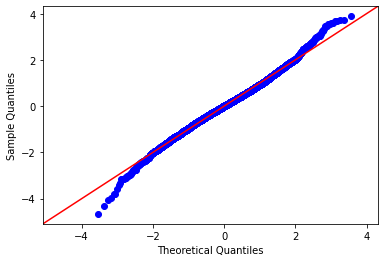

In [140]:
import scipy.stats as stats

residuals = (y_test - prediction)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Investigating Multicollinearity (Independence Assumption)


In [141]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_constant_added = sm.add_constant(X_train)
X_test_constant_added = sm.add_constant(X_test)

vif = [
    variance_inflation_factor(X_train_constant_added.values, i) 
    for i in 
       range(X_train_constant_added.shape[1])
      ]
variance_inf_fact = pd.Series(vif, index=X_train_constant_added.columns,
                              name="Variance Inflation Factor")
variance_inf_fact

const                2.747439e+06
bedrooms             1.685202e+00
sqft_living          3.033335e+00
floors               1.494159e+00
yr_built             1.616106e+00
lat                  1.084595e+00
waterfront_impute    1.007578e+00
10 Very Good         1.302611e+00
4 Low                1.058943e+00
5 Fair               1.327959e+00
6 Low Average        2.964444e+00
7 Average            3.979232e+00
8 Good               2.575319e+00
Name: Variance Inflation Factor, dtype: float64

In [142]:
df_final.drop(columns = to_drop, axis = 1, inplace = True)
corr(df_final, value = 0.1)

,0,pairs
0,0.618000,"(bedrooms, sqft_living)"
1,0.541451,"(7 Average, 8 Good)"
2,0.494984,"(floors, yr_built)"
3,0.398699,"(sqft_living, 6 Low Average)"
4,0.361239,"(yr_built, sqft_living)"
5,0.357894,"(sqft_living, floors)"
6,0.318403,"(sqft_living, 10 Very Good)"
7,0.317002,"(6 Low Average, yr_built)"
8,0.306924,"(sqft_living, 7 Average)"
9,0.302641,"(floors, 7 Average)"


### Investigating Homoscedasticity

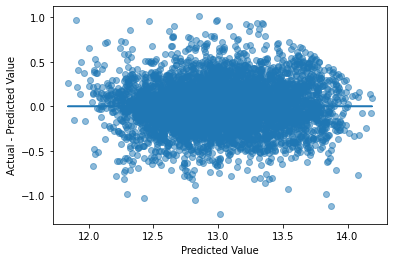

In [143]:
fig, ax = plt.subplots()

ax.scatter(prediction, residuals, alpha=0.5)
ax.plot(prediction, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

###  Investigating Linearity

11.314474526246391 14.310206799800381
11.838336142948549 14.19017730128553


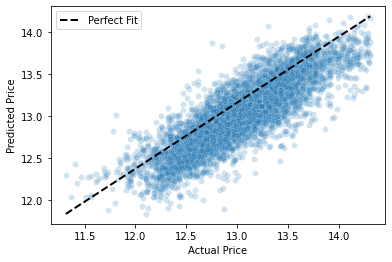

In [144]:
fig, ax = plt.subplots()

prediction = final_model.predict(X_test)


test_line = np.linspace(y_test.min(), y_test.max(), 200)
prediction_line = np.linspace(prediction.min(), prediction.max(), 200)
sns.lineplot(x = test_line, y = prediction_line
           , linestyle="--",
        color="black", label="Perfect Fit",
       lw = 2);
sns.scatterplot(x = y_test, y = prediction, alpha=0.2);
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();
print(y_test.min(), y_test.max())
print(prediction.min(), prediction.max())

# Model's Shortcomings

# Business Suggestion